In [1]:
from simulator import HathorSimulator, Miner, TxGenerator
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [11]:
sim = HathorSimulator(block_weight=23.66527225674778)

m0 = Miner(hashpower=100000)
sim.add_miner(m0)

g1 = TxGenerator(tx_lambda=1./20., hashpower=3000)
sim.add_tx_generator(g1)

In [12]:
sim.run(60*60)
print(len(sim.blocks), len(sim.transactions), len(sim.tips), len(sim.pow))

(0, 185, 1, 2)


In [13]:
sim.transactions[0].__dict__

{'acc_weight': 24.531381460516293,
 'extras': {},
 'is_tip': False,
 'name': '0',
 'parents': [],
 'publisher': None,
 'simulator': <simulator.HathorSimulator at 0x104f05850>,
 'time': 0,
 'type': 'genesis',
 'weight': 0}

In [14]:
sim.min_weight_confirmed

32.84893467477101

In [6]:
tx = list(sim.tips)[0]
tx = sim.tx_by_name[tx]

attrs = {'shape': 'polygon', 'sides': '5', 'penwidth': '2', 'color': '#4183D7', 'style': 'filled', 'fillcolor': '#E4F1FE'}
highlight = {}

def go(tx, highlight):
    if tx in highlight:
        return
    highlight[tx] = attrs
    for parent in tx.parents:
        go(parent, highlight)
go(tx, highlight)

Digraph.gv.pdf


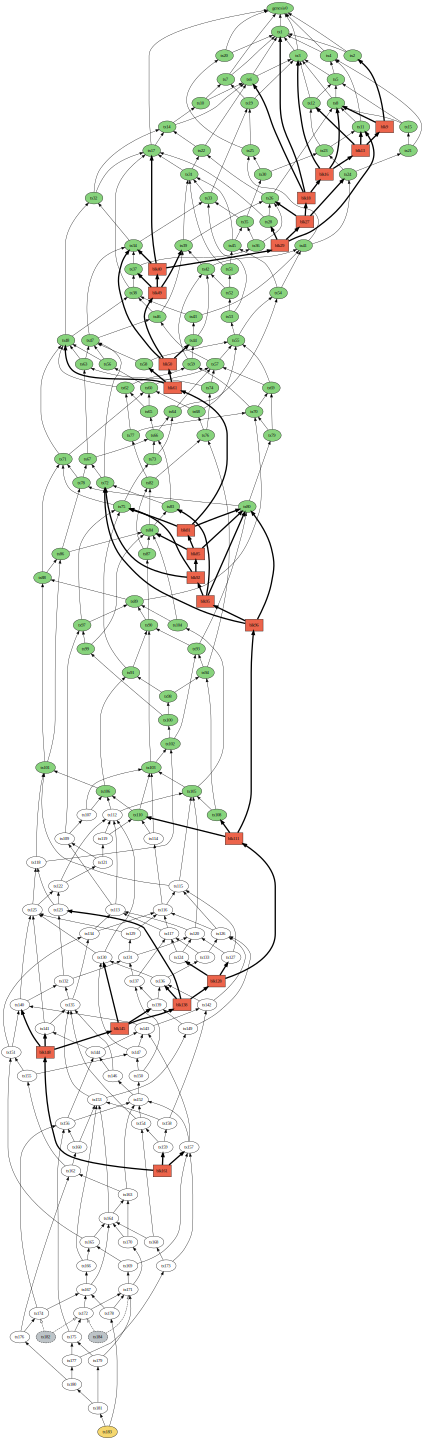

In [7]:
dot = sim.gen_dot()#highlight)
#dot.attr(rankdir='RL')
dot.attr(rankdir='BT')
dot.attr(size='1000, 20')
dot.attr(compound='true')

#with dot.subgraph(name='cluster_blocks') as g:
#    g.attr(style='filled')
#    g.attr(color='lightgrey')
#    for blk in sim.blocks:
#        g.node(blk.type + blk.name)
                
print(dot.render())
dot

In [ ]:
print(dot.source)